In [1]:
!pip install nltk

In [2]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import re

nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

In [4]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(words)

In [5]:
def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [6]:
df = pd.read_csv('/content/queried_data_twitter_cryptopunks.csv', nrows=200)
df['cleaned_text'] = df['Text'].apply(preprocess_text)
df['vader_sentiment'] = df['cleaned_text'].apply(analyze_sentiment_vader)

df.to_csv('vader_sentiment_analysis.csv', index=False)

In [7]:
df

,Date,Text,cleaned_text,vader_sentiment
0,2017-06-23 12:16:34,Got me an @dennisrodman #cryptopunk might be w...,got dennisrodman cryptopunk might willing swap...,positive
1,2017-06-24 00:03:08,@dennisrodman #cryptopunk number 7339 is up fo...,dennisrodman cryptopunk number sale eth best o...,positive
2,2017-06-24 21:44:39,Just sold my first #CryptoPunk - all appears t...,sold first cryptopunk appears working larvalab...,neutral
3,2017-06-24 22:53:21,Good job once again. #cryptocurrency #cryptopu...,good job cryptocurrency cryptopunk ether ethereum,positive
4,2017-06-24 23:58:42,I liked a @YouTube video https://t.co/8EE4BReY...,liked youtube video iota drops buy opportunity...,positive
...,...,...,...,...
195,2017-09-02 13:45:57,"Hmm... I know you'll do better, much better :)...",hmm know youll better much better,positive
196,2017-09-02 15:43:21,$NEO haters will hate... https://t.co/AixvPoP6nn,neo haters hate,negative
197,2017-09-02 18:16:27,People were complaining not long ago cus $NEO ...,people complaining long ago cus neo red portfo...,negative
198,2017-09-02 18:20:40,Must follows in #crypto #FF https://t.co/s5FqB...,must follows crypto ff,positive


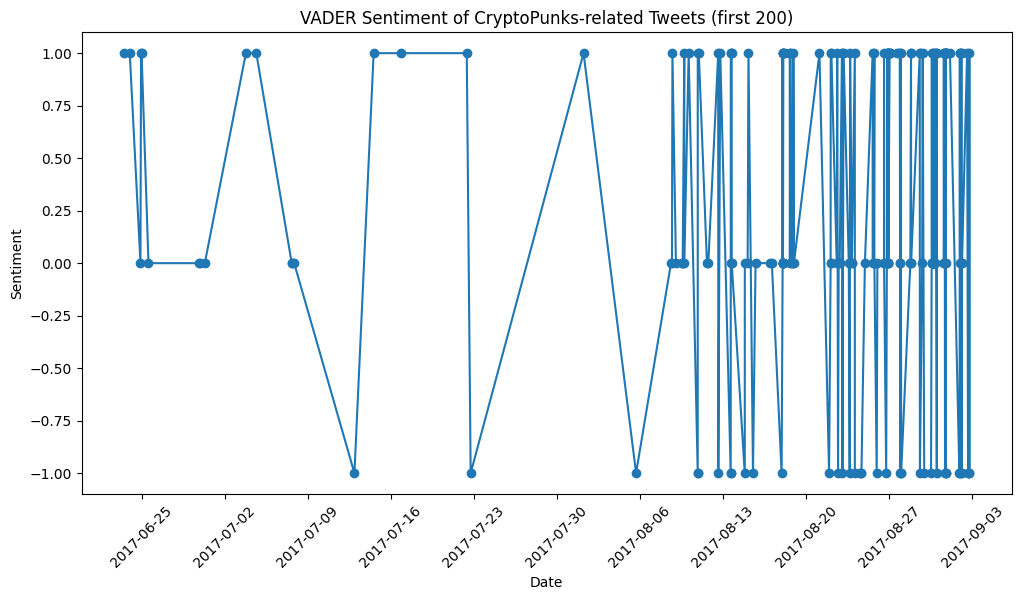

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df['Date'])

sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['SentimentValue'] = df['vader_sentiment'].map(sentiment_mapping)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SentimentValue'], marker='o')

plt.title('VADER Sentiment of CryptoPunks-related Tweets (first 200)')
plt.xlabel('Date')
plt.ylabel('Sentiment')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

plt.xticks(rotation=45)

plt.show()

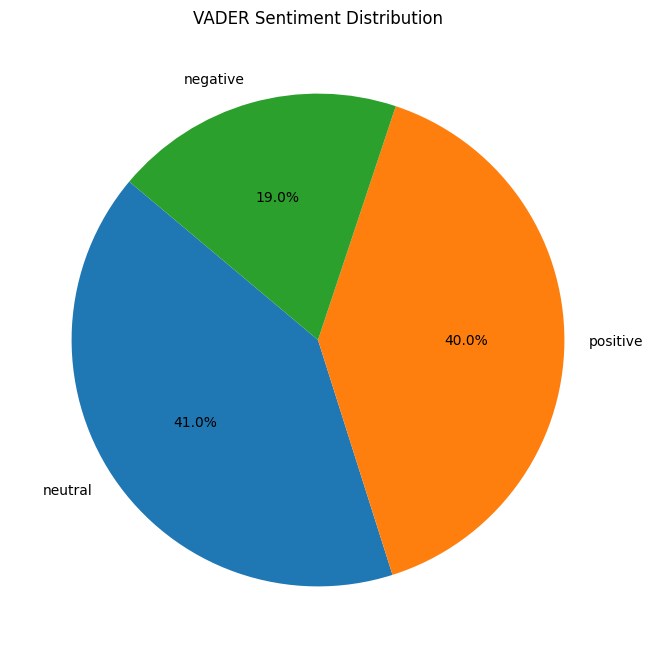

In [14]:
sentiment_counts = df['vader_sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('VADER Sentiment Distribution')
plt.show()